In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import numpy as np
import contextily as ctx

%matplotlib inline
#%matplotlib notebook

In [2]:
# --- additional libraries to install
#conda install -c conda-forge contextily 

# Functions

In [6]:
from shapely.geometry import Point

def create_gdf(df):
    # - create a new column Coordinates as a tuple of Longitude and Latitude
    df['Coordinates'] = list(zip(df.CenLon, df.CenLat)) 

    # - transform tuples to Point
    df['Coordinates'] = df['Coordinates'].apply(Point)
    
    # - create GeoDataFrame by setting geometry with the previously created coordinates
    gdf = gpd.GeoDataFrame(df, geometry='Coordinates', crs='epsg:4326') #'+init=epsg:3857')    
    
    return gdf

In [7]:
def plotMap(gdf, columnName, cmap=None, vmin=None, vmax=None, legend=True, alpha=.2, latRange=None, lonRange=None, latlonDelta=0, figName=None):
    """Plot geodataframe on map."""
    f = plt.figure(figsize=(20, 10))
    ax = plt.gca()

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.plot(ax=ax, facecolor='white', edgecolor='black')

    gpd.plotting.plot_dataframe(gdf, ax=ax, column=columnName, cmap=cmap, vmin=vmin, vmax=vmax, legend=legend, alpha=alpha)

    #- set coordinates
    if latRange is None:
        lat_range = [gdf.CenLat.min(), gdf.CenLat.max()]
    if lonRange is None:
        lon_range = [gdf.CenLon.min(), gdf.CenLon.max()]
    plt.ylim(lat_range[0]-latlonDelta, lat_range[1]+latlonDelta)
    plt.xlim(lon_range[0]-latlonDelta, lon_range[1]+latlonDelta)
    plt.show()

    if figName:
        f.savefig(figName)

In [8]:
def getStatistics(gdf, columnName):
    vmin=min(gdf[columnName])
    vmax=max(gdf[columnName])
    vmean=np.mean(gdf[columnName])
    
    p5, p95 = np.percentile(gdf[columnName], [5, 95])

    stats = {'min':vmin, 'max':vmax, 'mean':vmean, 'p5':p5, 'p95':p95}
    return stats

In [9]:
def list_of_hex_colours(N, base_cmap):
    """
    Return a list of colors from a colourmap as hex codes
        Arguments:
            cmap: colormap instance, eg. cm.jet.
            N: number of colors.
        Author: FJC
    """
    cmap = cm.get_cmap(base_cmap, N)

    hex_codes = []
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        hex_codes.append(mcolors.rgb2hex(rgb))
    
    return hex_codes

# Data exploration

In [10]:
p = '/home/khola/MEGA/PROJECTS/GEOX/various/2018-10-15_AutumnSchool/Hackathon_challenge/data/'
f = 'TSL_full.csv'
#df_obs = pd.read_csv(p+f) #, parse_dates=True, index_col='LS_DATE')
#df_obs = pd.read_csv(p+f, parse_dates=True, index_col='LS_DATE') #>> have LS_DATE as index column

f = 'TSL+RGI.csv'
df_obsF = pd.read_csv(p+f) #, parse_dates=True, index_col='LS_DATE')

/home/khola/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#df_obs
#df_obsF

In [3]:
print('Number of unique glaciers: {}'.format(len(df_obs['RGIId'].unique())))

Number of unique glaciers: 28501


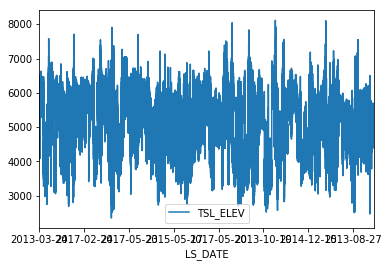

In [18]:
#df_obs = pd.read_csv(p+f) #, parse_dates=True, index_col='LS_DATE')
df_obs.plot(x='LS_DATE', y='TSL_ELEV')
#df_obs.plot('TSL_ELEV')


In [11]:
# === get glacier groups 

#glaciers = df_obs.groupby('RGIId')
#cmap = cm.jet(len(glaciers))

gb = df_obsF.groupby('RGIId')
for num, (grpName, grpData) in enumerate(gb):
    #print(num)
    #print(grpName)
    #print(grpData)
    lat = grpData.CenLat.unique()[0]
    lon = grpData.CenLon.unique()[0]
    
        

In [3]:
# === get glacier group properties
lat_range = [df_obsF.CenLat.min(), df_obsF.CenLat.max()]
lon_range = [df_obsF.CenLon.min(), df_obsF.CenLon.max()]
print(lat_range)
print(lon_range)


nb_glaciers = len(gb) 
cmap = cm.jet(nb_glaciers) 


[27.103999999999999, 45.333999999999996]
[67.539557505000005, 103.102]


NameError: name 'gb' is not defined

In [6]:
# --- attempt to filter
#gb_west = gb.filter(lambda x: x['CenLat'].unique()[0] < 30)

NameError: name 'gb' is not defined

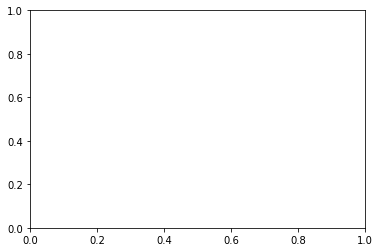

In [36]:
fig, axx = plt.subplots(1)

cmap = cm.jet
norm = Normalize(vmin=lat_range[0], vmax=lat_range[1])
#norm = Normalize(vmin=35.5749, vmax=35.6586)

for num, (grpName, grpData) in enumerate(gb):
    #print(num)
    #print(grpName)
    #print(grpData)
    
    #if num>10:
    #    break
        
    lat = grpData.CenLat.unique()[0]
    lon = grpData.CenLon.unique()[0]
    
    col = cmap(norm(lat))
    grpData.plot(x='LS_DATE', y='TSL_ELEV', label=lat, ax=axx, color=col, marker='.', legend=False)
    
    

In [7]:
# --- merge dataframes
#df = df.merge(df_obsC, left_on = 'RGIId', right_on = 'RGIId')
#df.join(df_obsC, lsuffix='_caller', rsuffix='_other')
 
#for id in ids:
#    this_df = df_obsC[df_obsC['RGIId'] == id]
#    cluster = this_df.iloc[0]['cluster_id']
#    df.loc[df.RGIId == id, 'cluster_id'] = cluster

,Unnamed: 0,Unnamed: 0.1,LS_SCENE,RGIId_caller,TSL_ELEV_caller,LS_DATE,GLIMSId,BgnDate,EndDate,CenLon,...,Status,Connect,Form,TermType,Surging,Linkages,Name,TSL_ELEV_other,RGIId_other,cluster_id
0,0,0,LC08_144035_20130324,RGI60-13.37155,4829.643459,2013-03-24,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,3635.858644,RGI60-13.05000,2.0
1,1,1,LC08_145035_20130319,RGI60-13.37155,4813.484054,2013-03-19,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,4491.475826,RGI60-13.05000,2.0
2,2,2,LC08_145035_20130522,RGI60-13.37155,4820.187323,2013-05-22,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,3793.027687,RGI60-13.05000,2.0
3,3,3,LC08_145035_20130623,RGI60-13.37155,4911.919386,2013-06-23,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,4207.889358,RGI60-13.05000,2.0
4,4,4,LC08_145035_20130725,RGI60-13.37155,4812.251878,2013-07-25,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,4274.115243,RGI60-13.05000,2.0
5,5,5,LC08_145035_20130911,RGI60-13.37155,4860.345203,2013-09-11,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,4027.995424,RGI60-13.05000,2.0
6,6,6,LC08_145035_20130927,RGI60-13.37155,4901.705018,2013-09-27,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,3611.814195,RGI60-13.05000,2.0
7,7,7,LC08_145035_20131013,RGI60-13.37155,4918.611907,2013-10-13,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,4065.943496,RGI60-13.05000,2.0
8,8,8,LC08_145035_20131216,RGI60-13.37155,4836.450792,2013-12-16,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,3279.821701,RGI60-13.05000,2.0
9,9,9,LC08_145035_20140101,RGI60-13.37155,4859.000000,2014-01-01,G081430E36003N,20110805,-9999999,81.430000,...,0,0,0,0,9,9,NaN,3762.554234,RGI60-13.05000,2.0


In [49]:

gb = gdf.groupby('cluster_id')
for num, (grpName, grpData) in enumerate(gb):
    print(num)
    print(grpName)
    #print(grpData)
    #lat = grpData.CenLat.unique()[0]
    #lon = grpData.CenLon.unique()[0]

0
1.0
1
2.0
2
3.0
3
4.0
4
5.0


In [52]:
gb['CenLat'].mean()
gb['Slope'].mean()

cluster_id
1.0    23.951125
2.0    21.270837
3.0    23.621131
4.0    22.961757
5.0    21.995966
Name: Slope, dtype: float64

# Plot clusters

In [12]:
# --- load dataframe with clusters
# NB: lat/lon in epsg:4326
p = '/home/khola/MEGA/PROJECTS/GEOX/various/2018-10-15_AutumnSchool/Hackathon_challenge/data/'
f = 'TSL+RGI_clustered.csv'
df = pd.read_csv(p+f)

/home/khola/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# - subset df where cluster id are available
cluster_id = df['cluster_id'].unique()
cluster_id = cluster_id[~np.isnan(cluster_id)] #>> drop nan
df = df[df['cluster_id'].isin(cluster_id)]

In [14]:
# === create gdf
gdf = create_gdf(df)

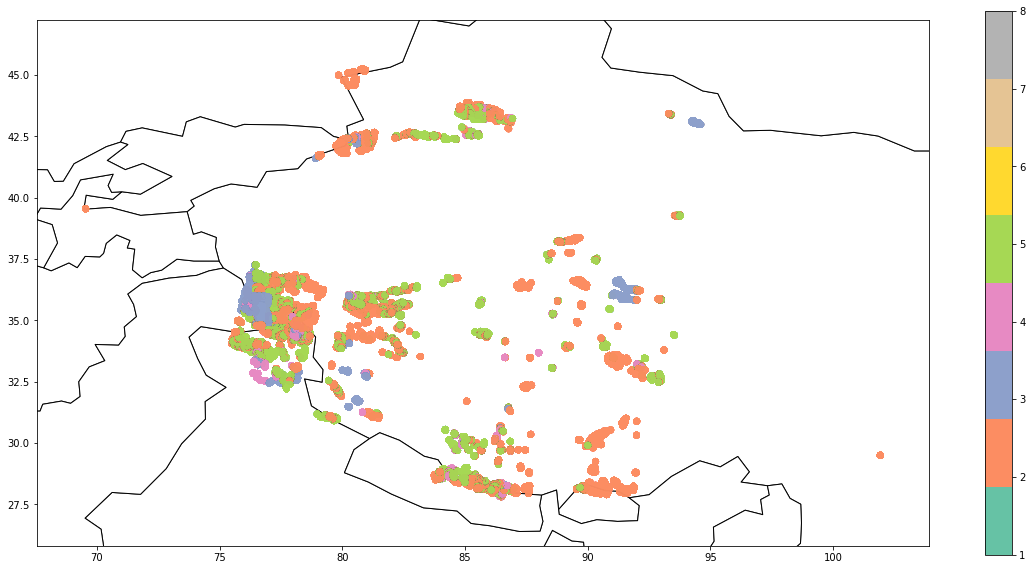

In [26]:
# plot clusters (colormap = Set2)
cmap = cm.get_cmap('Set2', 8)

plotMap(gdf, 'cluster_id', cmap=cmap, alpha=.1, vmin=1, vmax=8, latlonDelta=2, figName='glaciers_groups_new.png')

{'min': 1.0, 'max': 5.0, 'mean': 3.1762691944754224, 'p5': 2.0, 'p95': 5.0}


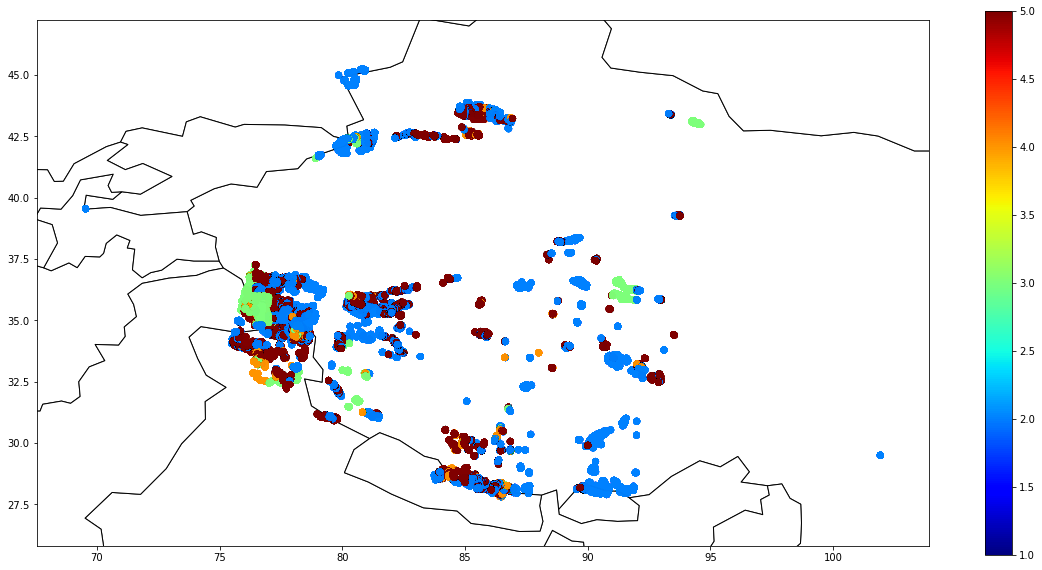

In [47]:
# === plot clusters (colormap = jet)
stats = getStatistics(gdf, 'cluster_id')
print(stats)

plotMap(gdf, 'cluster_id', cmap='jet', alpha=.2, latlonDelta=2, figName='glaciers_clusters.png')

In [7]:
# --- convert data to EPSG 3857
#Web map tiles are typically provided in Web Mercator (EPSG 3857), so we need to make sure to convert our data first to the same CRS to combine our polygons and background tiles in the same map:
#gdf = gdf.to_crs(epsg=3857)

RuntimeError: b'no arguments in initialization list'

- cluster 5.0
   lat=36.003, lon=81.43
- cluster 2.0
   lat=36.001, lon=81.41199999999998
- cluster 4.0
   lat=35.977, lon=81.389
- cluster 3.0
   lat=43.051, lon=94.331
- cluster 1.0
   lat=34.637849951, lon=77.19068197600001
[27.81501624, 45.247944433]
[69.540974835, 101.925]


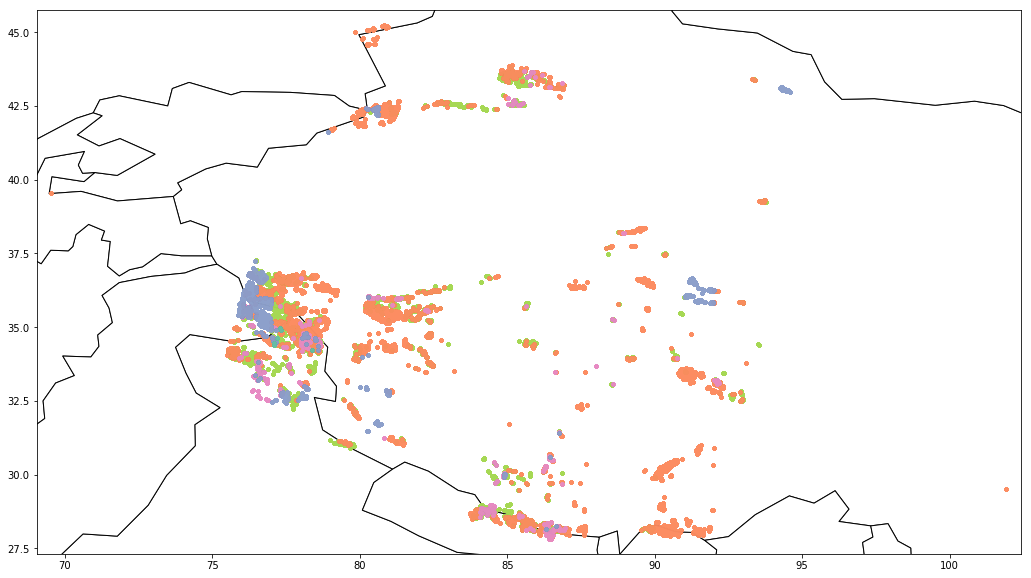

In [24]:
# === plot clusters (specify colors manually)

f = plt.figure(figsize=(20, 10))
ax = plt.gca()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, facecolor='white', edgecolor='black')

#ax = world[world.continent == 'Asia'].plot(color='white', edgecolor='black')
#ax = world[world.name == 'China'].plot(color='white', edgecolor='black')

#colors = ['red', 'blue', 'green', 'orange', 'black']
#colors = list_of_hex_colours(8, 'Set2')
colors = ['#a6d854', '#fc8d62', '#e78ac3', '#8da0cb', '#66c2a5']
#cmap = cm.jet
#norm = Normalize(vmin=min(cluster_id), vmax=max(cluster_id))

for k, c_id in enumerate(cluster_id):
    print('- cluster {}'.format(c_id))

    #col = cmap(norm(c_id))
    col = colors[k]
    gdf_cluster = gdf[gdf['cluster_id'].isin([c_id])]
    gdf_cluster.plot(ax=ax, color=col, markersize=10, legend=True, alpha=.2)
    
    print('   lat={}, lon={}'.format(gdf_cluster['CenLat'].unique()[0], gdf_cluster['CenLon'].unique()[0]))

#- set coordinates
lat_range = [gdf.CenLat.min(), gdf.CenLat.max()]
lon_range = [gdf.CenLon.min(), gdf.CenLon.max()]
print(lat_range)
print(lon_range)

delta = 0.5
plt.ylim(lat_range[0]-delta, lat_range[1]+delta)
plt.xlim(lon_range[0]-delta, lon_range[1]+delta)

plt.show()
#plt.colorbar()

f.savefig('new')

# --- try to add map below
##add_basemap(ax, zoom=10)

##zoom = ctx.calculate_zoom(loc.w, loc.s, loc.e, loc.n)
#xmin, xmax, ymin, ymax = (lon_range[0]-delta, lon_range[1]+delta, lat_range[0]-delta, lat_range[1]+delta)
#basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=10, ll=True)
#ax.imshow(basemap, extent=extent, interpolation='bilinear')
#ax.axis((xmin, xmax, ymin, ymax))


In [7]:
hex_codes = list_of_hex_colours(8, 'Set2')

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

# Plot annual trend

In [8]:
# --- load dataframe with annual trends
p = '/home/khola/MEGA/PROJECTS/GEOX/various/2018-10-15_AutumnSchool/Hackathon_challenge/data/'
f = 'Glacier_info_annual_trends.csv'
df = pd.read_csv(p+f)

In [9]:
# === create gdf
gdf = create_gdf(df)

In [13]:
gdf

,Unnamed: 0,index,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,...,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,AnnualTrend,Coordinates
0,0,1,RGI60-15.00002,G102042E29987N,19990920,-9999999,102.042346,29.987019,15,3,...,1021,0,0,0,0,9,9,NaN,0.000000,POINT (102.042345625 29.987019467)
1,1,3,RGI60-15.00004,G102050E29962N,19990920,-9999999,102.050283,29.962297,15,3,...,2318,0,0,0,0,9,9,NaN,-1.355230,POINT (102.050282604 29.96229677900001)
2,2,6,RGI60-15.00007,G102051E30015N,19990920,-9999999,102.050820,30.014503,15,3,...,1381,0,0,0,0,9,9,NaN,-73.915829,POINT (102.05082014 30.014502807)
3,3,8,RGI60-15.00009,G102045E30005N,19990920,-9999999,102.045441,30.004917,15,3,...,705,0,0,0,0,9,9,NaN,0.000000,POINT (102.045440674 30.004917145)
4,4,15,RGI60-15.00016,G099791E29976N,20001006,-9999999,99.790792,29.975860,15,3,...,1606,0,0,0,0,9,9,NaN,0.000000,POINT (99.79079176200001 29.975860472)
5,5,16,RGI60-15.00017,G099647E29876N,20001006,-9999999,99.647058,29.875674,15,3,...,1185,0,0,0,0,9,9,NaN,0.000000,POINT (99.64705753700001 29.875673668)
6,6,18,RGI60-15.00019,G099634E29935N,20001006,-9999999,99.634456,29.934847,15,3,...,1512,0,0,0,0,9,9,NaN,30.028751,POINT (99.63445575899999 29.934847484)
7,7,19,RGI60-15.00020,G099633E29909N,20001006,-9999999,99.633153,29.908966,15,3,...,2857,0,0,0,0,9,9,NaN,-8.132922,POINT (99.633153209 29.908965733)
8,8,20,RGI60-15.00021,G099652E29909N,20001006,-9999999,99.652074,29.909050,15,3,...,1358,0,0,0,0,9,9,NaN,0.000000,POINT (99.65207358799999 29.909049776)
9,9,22,RGI60-15.00023,G099596E29796N,20001006,-9999999,99.596500,29.796079,15,3,...,1319,0,0,0,0,9,9,NaN,0.000000,POINT (99.59649989200001 29.79607919)


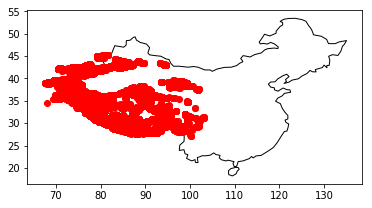

In [15]:
# === plot all
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#ax = world[world.continent == 'Asia'].plot(color='white', edgecolor='black')
ax = world[world.name == 'China'].plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

In [10]:
# --- plot with color based on AnnualTrend (SLOW STUPID METHOD)
#f, ax = plt.subplots(1)
#
#cmap = cm.seismic
#norm = Normalize(vmin=min(gdf['AnnualTrend']), vmax=max(gdf['AnnualTrend']))
#
#ids = df['RGIId'].unique()
#
#for k, c_id in enumerate(ids):
#    print('- {}/{} (id = {})'.format(k, len(ids), c_id))
#    #if k>10:
#    #    break
#    
#    gdf_cluster = gdf[gdf['RGIId'].isin([c_id])]
#    col = cmap(norm(gdf_cluster['AnnualTrend']))
#    gdf_cluster.plot(ax=ax, color=col, markersize=10) #, legend=True)
#plt.show()
#f.savefig('annual_trends.png')

In [24]:
# List columns in dataframe
list(gdf)

['Unnamed: 0',
 'index',
 'RGIId',
 'GLIMSId',
 'BgnDate',
 'EndDate',
 'CenLon',
 'CenLat',
 'O1Region',
 'O2Region',
 'Area',
 'Zmin',
 'Zmax',
 'Zmed',
 'Slope',
 'Aspect',
 'Lmax',
 'Status',
 'Connect',
 'Form',
 'TermType',
 'Surging',
 'Linkages',
 'Name',
 'AnnualTrend',
 'Coordinates']

{'min': -820.5324502332742, 'max': 927.5166913280948, 'mean': 2.444512858438107}


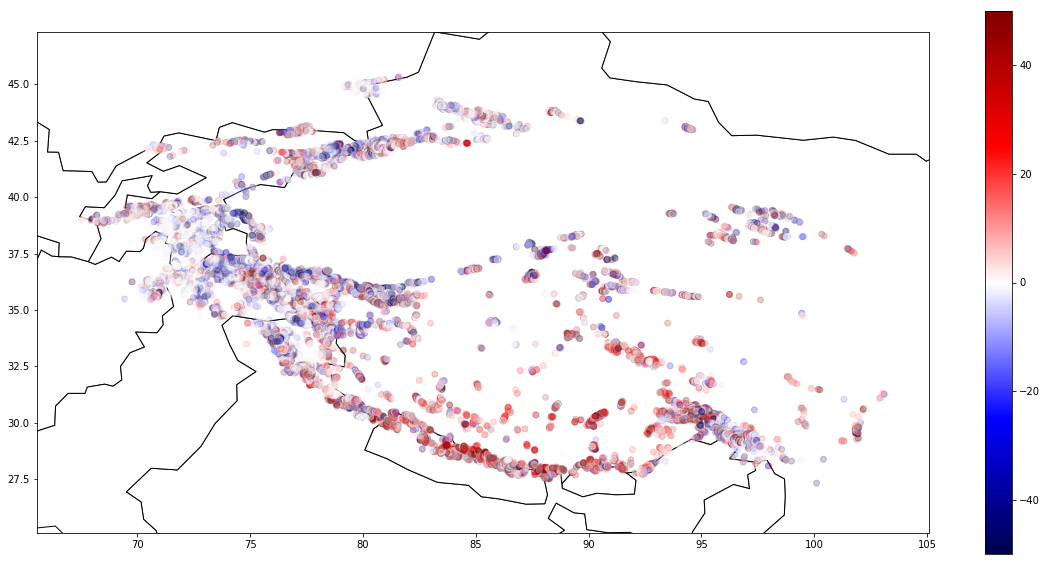

In [28]:
# === plot AnnualTrend

stats = getStatistics(gdf, 'AnnualTrend')
print(stats)

plotMap(gdf, 'AnnualTrend', cmap='seismic', vmin=-50, vmax=50, alpha=.2, latlonDelta=2, figName='glaciers_AnnualTrend.png')

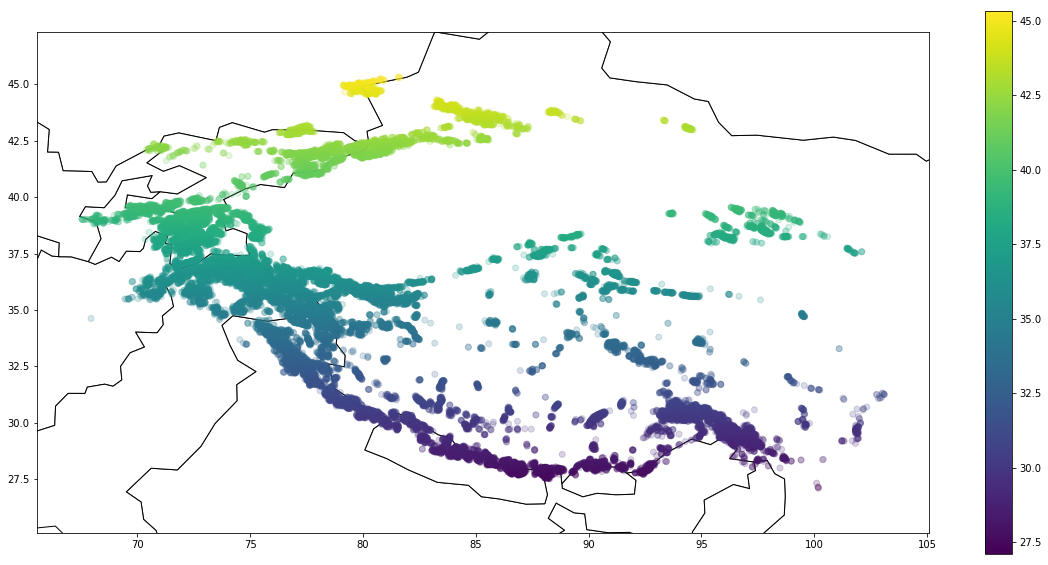

In [26]:
# === plot Latitude
plotMap(gdf, 'CenLat', cmap=None, alpha=.2, latlonDelta=2, figName='glaciers_latitude.png')

{'min': 0.501, 'max': 1077.958, 'mean': 3.015364653871791}


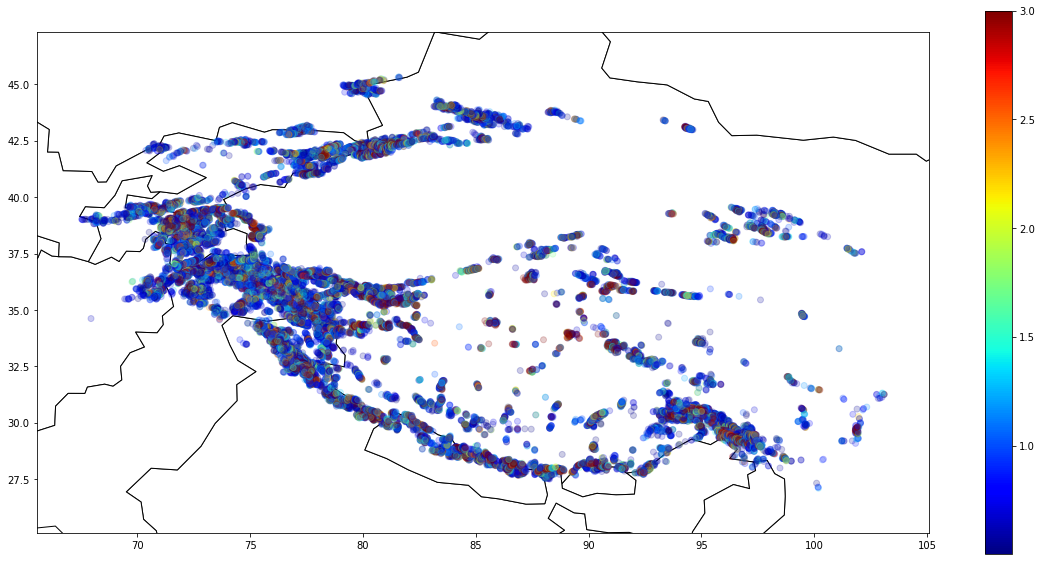

In [36]:
# === plot Area
stats = getStatistics(gdf, 'Area')
print(stats)

plotMap(gdf, 'Area', cmap='jet', vmin=stats['min'], vmax=3, alpha=.2, latlonDelta=2, figName='glaciers_area.png')

{'min': 4.0, 'max': 61.3, 'mean': 22.06702220974696, 'p5': 12.6, 'p95': 34.3}


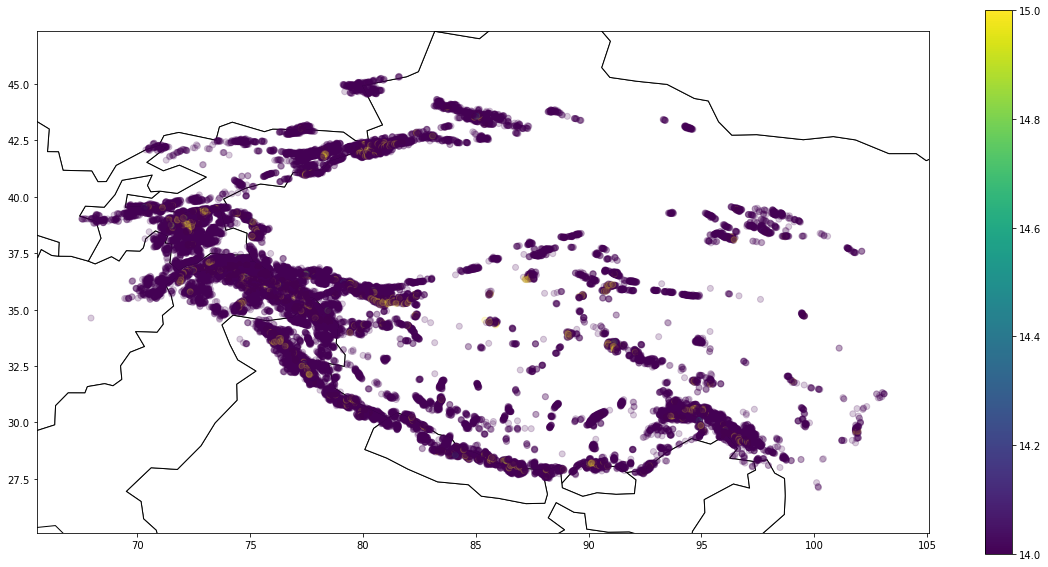

In [43]:
# === plot Area
stats = getStatistics(gdf, 'Slope')
print(stats)

plotMap(gdf, 'Area', cmap=None, vmin=14, vmax=15, alpha=.2, latlonDelta=2, figName='glaciers_slope.png')

# Attempt to add background map to plots
https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html


In [8]:
gdf = gdf.to_crs(epsg=3857)

In [8]:
gdf.crs

In [ ]:
# --- playground
f, ax = plt.subplots(1)

cmap = cm.jet
norm = Normalize(vmin=min(cluster_id), vmax=max(cluster_id))

for k, c_id in enumerate(cluster_id):
    print('- cluster {}'.format(c_id))

    col = cmap(norm(c_id))
    #col = colors[k]
    gdf_cluster = gdf[gdf['cluster_id'].isin([c_id])]
    gdf_cluster.plot(ax=ax, color=col, markersize=10, legend=True)
    
#- set coordinates
lat_range = [gdf.CenLat.min(), gdf.CenLat.max()]
lon_range = [gdf.CenLon.min(), gdf.CenLon.max()]
delta = 0.5
xmin, xmax, ymin, ymax = (lon_range[0]-delta, lon_range[1]+delta, lat_range[0]-delta, lat_range[1]+delta)
basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=10, ll=True)
ax.imshow(basemap, extent=extent, interpolation='bilinear')
ax.axis((xmin, xmax, ymin, ymax))

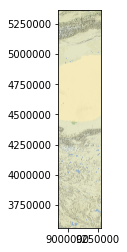

In [22]:
f, ax = plt.subplots(1)
basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=10, ll=True)
ax.imshow(basemap, extent=extent, interpolation='bilinear')

In [15]:
ax = gdf.to_crs(epsg=4326).plot(figsize=(9, 9))
ctx.add_basemap(ax);

RuntimeError: b'no arguments in initialization list'

In [17]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax) #, url=url) #zoom=zoom, 
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

/home/khola/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


w: -105.3014509
s: 39.9643513
e: -105.1780988
n: 40.094409
place: Boulder, Boulder County, Colorado, USA
zoom: 13
n_tiles: 1


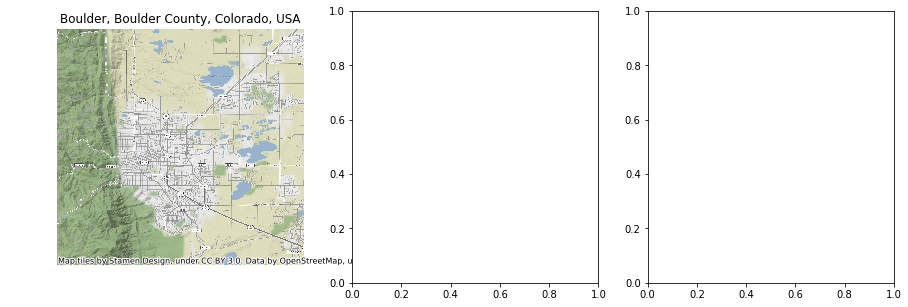

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

loc = ctx.Place('boulder', zoom_adjust=0)  # zoom_adjust modifies the auto-zoom

# Print some metadata
for attr in ['w', 's', 'e', 'n', 'place', 'zoom', 'n_tiles']:
    print('{}: {}'.format(attr, getattr(loc, attr)))

# Show the map
im1 = loc.im

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ctx.plot_map(loc, ax=axs[0])